# Logistics Regression Explaination version (Multiclass: One-vs-all)

### Penulis: Patuan P. Tampubolon

Package yang perlu kita gunakan.

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

# 1. Pendahuluan

Logistic regression merupakan algoritma klasifikasi. Ini berarti dependent variabelnya (targetnya) berupa nilai diskrit. Ada tiga jenis klasifikasi yang dapat diselesaikan, yaitu: 
- binary: contoh targetnya (0 dan 1), (kucing dan anjing), (ya dan tidak), dan lain-lain
- multy: contoh targetnya (0,1 dan 2), (cerah, hujan, dan mendung), dan lain-lain
- ordinal: contoh targetnya (mudah, sedang, dan sulit), (tidak setuju, setuju dan sangat setuju), (tidak normal, normal, luar biasa), dan lain-lain.

Pada pembelajaran ini akan dipaparkan implementasi untuk permasalahan multiclassification dengan pendekatan one-vs-rest.

Dataset yang digunakan sebagai contoh adalah Iris dataset.

# 2. Dataset

In [2]:
iris = datasets.load_iris()

Dataset iris merupakan dataset yang mengelompokkan spesies bunga iris menjadi tiga kelas. Yaitu:

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Untuk mengelompokkan bunga tersebut, ada 4 ciri2 yang digunakan, yaitu:

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Pada machine learning, fitur-fiturnya akan dijadikan predictor (X) , dan kelasnya sebagai target (y). Implementasinya pada python adalah sebagai berikut ini.

In [5]:
X = iris.data
X[0:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [6]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Sekarang tentukan X dan y untuk training dan testing.

# 3. Tools yang diperlukan

## 3.1. Fungsi aktifasi (Sigmoid vs Softmax)

Fungsi logistic atau sigmoid merupakan fungsi yang memetakan nilai prediksi (real value) menjadi nilai peluang antara 0 dan 1 (perhatikan Gambar 1). Fungsi sigmoid dirumuskan sebagai berikut.

## $f(x) = \frac{1}{1+e^{-x}}$ ----> (1)

Jika diimplemantasikan kedalam bahasa python maka fungsi tersebut akan menjadi seperti berikut ini.

In [7]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [8]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

Penggunaan fungsi sigmoid diatas seperti yang dapat kita lihat di bawah ini.

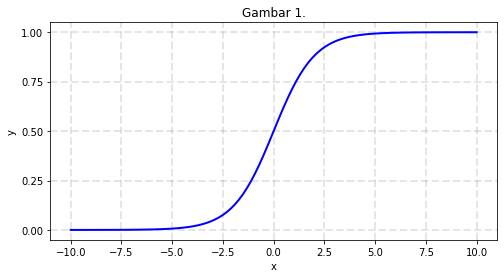

In [10]:
# menghitung nilai sigmoid
xx = np.linspace(-10, 10, 100) # membentuk barisan -10 ke 10 sebanyak 100 titik
yy = sigmoid(xx)

# Membentuk grafik
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.plot(xx, yy, linewidth=2, color='blue')
ax.grid(linestyle='--', linewidth=2, color='gray', alpha=0.2)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set(xlabel='x', ylabel='y')
plt.title('Gambar 1.')
plt.show()

Walaupun sigmoid menghitung peluang, sigmoid memiliki kekurangan. Jika sederet angka dimasukkan kedalam fungsi sigmoid, maka jumlah peluang-peluang tersebut tidak sama dengan 1.

Contoh:

In [11]:
nilai = np.array([-2,-1,0,1,2])
peluang = sigmoid(nilai)

In [12]:
peluang

array([0.11920292, 0.26894142, 0.5       , 0.73105858, 0.88079708])

In [13]:
peluang.sum()

2.5

In [14]:
peluang2 = softmax(nilai)
peluang2

array([0.01165623, 0.03168492, 0.08612854, 0.23412166, 0.63640865])

In [15]:
peluang2.sum()

1.0

## 3.2. Decision boundary (binary class)

Untuk memprediksi kita perlu mencari nilai threshold (batas ambang) yang digunakan untuk menentukan prediksi kelas. Misal diambil nilai thresholdnya adalah 0.5 untuk kelas 0 atau kelas 1, dengan demikian jika nilai yang diprediksi lebih besar dari 0.5, maka data tersebut dijadikan kelas 1, selain dari pada itu kelas 0. Dengan cara inilah kita menjadikan nilai peluang tersebut menjadi nilai diskrit.

Implemantasi:

In [16]:
def decision_boundary(prob):
    for i, val in enumerate(prob):
        if val >= 0.5:
            prob[i] = 1
        else:
            prob[i] = 0
    return prob

Kita gunakan hasil peluang dari sebelumnya.

In [17]:
peluang = np.random.randn(5)
peluang

array([ 0.01083142,  0.65815974,  1.72816668, -1.52166737,  0.7964942 ])

In [18]:
decision_boundary(peluang)

array([0., 1., 1., 0., 1.])

## 3.3. Cost Function

Untuk menentukan seberapa baik kita melakukan prediksi, kita perlu membuat sebuah cost function yang disebut dengan Cross-entropy loss. Seperti yang dirumuskan di bawah ini:

#### $Cost(h_{\theta}(x),y) = -log(h_{\theta}(x))\  jika \ y = 1$  ----->(2)
#### $Cost(h_{\theta}(x),y) = -log(1-h_{\theta}(x))\  jika \ y = 0$ ---->(3)

Gambar 2 dan 3 merupakan grafik yang ditunjukkan eq.2 dan eq.3 secara berurutan.

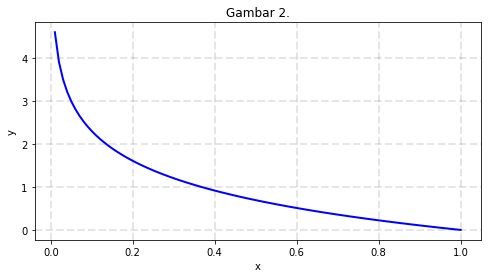

In [23]:
aa = np.linspace(0.01, 1, 100)
bb = -np.log(aa)

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.plot(aa, bb, linewidth=2, color='blue')
ax.grid(linestyle='--', linewidth=2, color='gray', alpha=0.2)
ax.set(xlabel='x', ylabel='y')
plt.title('Gambar 2.')
plt.show()

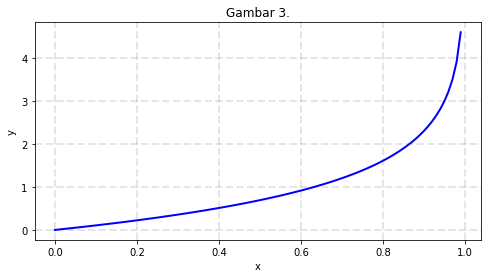

In [24]:
cc = np.linspace(0, 0.99, 100)
dd = -np.log(1-cc)

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.plot(cc, dd, linewidth=2, color='blue')
ax.grid(linestyle='--', linewidth=2, color='gray', alpha=0.2)
ax.set(xlabel='x', ylabel='y')
plt.title('Gambar 3.')
plt.show()

Terlihat dari Gambar 2 dan 3 bahwa kedua fungsi tersebut merupakan fungsi smooth monotonic (selalu naik dan selalu turun). Sifat tersebut, membuatnya mudah untuk menghitung gradien dan meminimumkan cost. Penggabungan dari eq. 2 dan 3 akan menjadi eq.4 dibawah ini:

#### $J(\theta) = - \frac{1}{m} \sum_{i=1}^{m}[y^{(i)}\log (h_{\theta}(x^{(i)})) + (1-y^{(i)})\log(1-h_{\theta}(x^{(i)})]$ ----> (4)

Eq. 4 dapat dihitung secara vektorisasi dengan eq. 5 dibawah ini.

#### $h = g(X\theta)$
#### $J(\theta) = \frac{1}{m}(-y^{T}\log (h) - (1-y)^{T}\log (1-h))$ -----> (5)

Eq. 5 dapat diimplementasikan sebagai berikut.

In [25]:
def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)) / y.size

In [26]:
theta0 = np.random.rand(X.shape[1]) # theta diinisialisasi dengan angka 0
theta0

array([0.06509588, 0.08347551, 0.78757499, 0.10944418])

In [29]:
z0 = np.dot(X, theta0)
z0[0:20]

array([1.74864709, 1.69389016, 1.61880858, 1.76146644, 1.75048505,
       2.05972739, 1.71869601, 1.81254745, 1.65299466, 1.77005079,
       1.86362845, 1.87828577, 1.67643615, 1.40761571, 1.67843696,
       1.96347891, 1.74469739, 1.7595915 , 2.05996418, 1.86339166])

In [32]:
h0 = sigmoid(z0)
h0[0:20]

array([0.85178208, 0.84473507, 0.83463075, 0.85339323, 0.85201397,
       0.88692683, 0.8479608 , 0.85966947, 0.83929538, 0.85446399,
       0.86571931, 0.8674141 , 0.84243204, 0.80338961, 0.84269745,
       0.87690896, 0.85128274, 0.85315849, 0.88695058, 0.86569178])

In [33]:
res = cost(h0,y)
res[0:20]

array([0.01272714, 0.01241748, 0.01199716, 0.01280001, 0.01273758,
       0.01453147, 0.01255745, 0.0130917 , 0.01218791, 0.01284888,
       0.01338549, 0.01347016, 0.01231932, 0.01084354, 0.01233056,
       0.01396554, 0.01270472, 0.01278934, 0.01453287, 0.01338412])

In [34]:
res.mean()

-0.007337120514377228

## 3.4. Gradient Descent (minimizing cost)

Gradient descent digunakan untuk mengatur nilai theta. Adapun algoritma gradient descent dapat dilakukan dalam 3 tahap, yaitu:
1. hitung rata-rata gradien
2. kalikan dengan nilai learning rate (lr atau alpha)
3. Kurangi dari bobot sebelumnya

Implementasi dari gradient descent dapat dilihat dibawah ini.

Membangun theta atau bobot

In [41]:
theta = np.zeros(X.shape[1]) # theta diinisialisasi dengan angka 0
theta

array([0., 0., 0., 0.])

Perkalian antara X dan bobotnya

In [36]:
z = np.dot(X, theta)
z

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Menghitung nilai sigmoid dari z

In [37]:
h = sigmoid(z)
h

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

Menghitung rata-rata gradient

In [38]:
gradient = np.dot(X.T, (h - y)) / y.size # rata-rata gradient
gradient

array([-3.449     , -1.37733333, -3.24233333, -1.193     ])

Menghitung bobot yang baru jika nilai learning rate (alpha) adalah 0.1

In [39]:
alpha = 0.1
theta = theta - alpha * gradient
theta

array([0.3449    , 0.13773333, 0.32423333, 0.1193    ])

In [40]:
def grad_desc(X, y, theta, alpha, num_iter):
    theta_new = np.copy(theta)

    for i in range(num_iter):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta_new = theta_new - alpha * gradient
    print('iter num: ', i, 'cost : ', cost(h, y).mean(), 'theta: ', theta_new)
    return theta_new

In [42]:
gr = grad_desc(X,y,theta,0.1,10)

iter num:  9 cost :  0.004620981203732968 theta:  [3.449      1.37733333 3.24233333 1.193     ]


Ketika kita membuat memasukan features kita perlu memasukkan 

## 3.5 Fungsi prediksi

In [43]:
def predict(Xt, theta):
    z = np.dot(Xt, theta)
    return sigmoid(z)

In [44]:
pred = predict(X,theta)
pred

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [45]:
pred = decision_boundary(pred)
pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## 3.6. Relabel Target

Karena kita akan membuat logistic regression untuk multiclass kita perlu melabel kembali label yang sudah ada menjadi sebanyak kelasnya.

In [46]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
label = list(set(y))
label

[0, 1, 2]

In [52]:
relabeled_data = np.zeros(len(y)*len(label)).reshape(len(y),len(label))
relabeled_data[0:20,:]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [53]:
for i in range(len(label)):
    relabeled_data[y==label[i],i] = 1

In [55]:
#relabeled_data

In [56]:
def relabel_data(y):
    label = list(set(y))
    relabeled_data = np.zeros(len(y)*len(label)).reshape(len(y),len(label))
    for i in range(len(label)):
        relabeled_data[y==label[i],i] = 1
    return (len(label), relabeled_data)

In [65]:
_,rbl = relabel_data(y)[0:50]
rbl[0:50]
#rbl[50:100]
#rbl[100:150]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

# 4. Langkah pembuatan model langkah per langkah

## 4.1 Split Train dan Test

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

## 4.2. Menyesuaikan data pada model

Model logistic regression yang kita akan gunakan merupakan model linear seperti yang ditunjukkan pada gambar dibawah ini. Dengan Demikian kita harus menambahkan angka 1 pada X, menginisialisasi $\theta$, dan merelabel y.

![image](linearModel.png)

Catatan: di dalam coding menggunakan $\theta$, gambar diatas menggunakan $\beta$. Mereka dimaksudkan sama, yaitu bobot.

In [67]:
X[0:20,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [70]:
satu = np.ones((len(X_train))).reshape(-1,1)
satu[0:20,:]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [72]:
X_new = np.concatenate((satu, X_train),axis = 1)
X_new[0:10,:]

array([[1. , 5.7, 4.4, 1.5, 0.4],
       [1. , 5.8, 2.6, 4. , 1.2],
       [1. , 5.9, 3. , 5.1, 1.8],
       [1. , 5.8, 2.8, 5.1, 2.4],
       [1. , 5.1, 3.8, 1.5, 0.3],
       [1. , 4.8, 3. , 1.4, 0.1],
       [1. , 4.6, 3.2, 1.4, 0.2],
       [1. , 6.9, 3.1, 5.1, 2.3],
       [1. , 7.7, 3.8, 6.7, 2.2],
       [1. , 6.4, 2.9, 4.3, 1.3]])

In [73]:
def addintercept(x):
    return np.concatenate((np.ones((len(x))).reshape(-1,1), x),axis = 1)

In [75]:
X_new = addintercept(X_train)
X_new[0:10,:]

array([[1. , 5.7, 4.4, 1.5, 0.4],
       [1. , 5.8, 2.6, 4. , 1.2],
       [1. , 5.9, 3. , 5.1, 1.8],
       [1. , 5.8, 2.8, 5.1, 2.4],
       [1. , 5.1, 3.8, 1.5, 0.3],
       [1. , 4.8, 3. , 1.4, 0.1],
       [1. , 4.6, 3.2, 1.4, 0.2],
       [1. , 6.9, 3.1, 5.1, 2.3],
       [1. , 7.7, 3.8, 6.7, 2.2],
       [1. , 6.4, 2.9, 4.3, 1.3]])

In [76]:
nclass, y_new = relabel_data(y_train)
nclass

3

In [79]:
y_new[0:10,:]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

## 4.3 Menginisalisasi Theta

In [80]:
theta0 = np.zeros(X_new.shape[1])
theta0

array([0., 0., 0., 0., 0.])

In [81]:
theta1 = np.zeros(X_new.shape[1])
theta1

array([0., 0., 0., 0., 0.])

In [82]:
theta2 = np.zeros(X_new.shape[1])
theta2

array([0., 0., 0., 0., 0.])

## 4.4. menghitung z

In [83]:
z0 = np.dot(X_new, theta0)
z0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [84]:
z1 = np.dot(X_new, theta1)
z1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [85]:
z2 = np.dot(X_new, theta2)
z2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

## 4.5. menghitung h

In [86]:
h0 = sigmoid(z0)
h0

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5])

In [87]:
h1 = sigmoid(z1)
h1

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5])

In [88]:
h2 = sigmoid(z2)
h2

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5])

## 4.6.  Menghitung gradient

In [92]:
y_new[0:10,:]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [89]:
gradient0 = np.dot(X_new.T, (h0 - y_new[:,0])) / y_new[:,0].size # rata-rata gradient
gradient0

array([0.16666667, 1.27541667, 0.39541667, 1.41416667, 0.525     ])

In [90]:
gradient1 = np.dot(X_new.T, (h1 - y_new[:,1])) / y_new[:,1].size # rata-rata gradient
gradient1

array([0.175     , 0.99875   , 0.62041667, 0.50166667, 0.16666667])

In [91]:
gradient2 = np.dot(X_new.T, (h2 - y_new[:,2])) / y_new[:,2].size # rata-rata gradient
gradient2

array([ 0.15833333,  0.67875   ,  0.52125   , -0.00916667, -0.0825    ])

## 4.7. Update theta

In [93]:
alpha = 0.1

In [94]:
theta0 = theta0 - alpha * gradient0
theta0

array([-0.01666667, -0.12754167, -0.03954167, -0.14141667, -0.0525    ])

In [95]:
theta1 = theta1 - alpha * gradient1
theta1

array([-0.0175    , -0.099875  , -0.06204167, -0.05016667, -0.01666667])

In [96]:
theta2 = theta2 - alpha * gradient2
theta2

array([-0.01583333, -0.067875  , -0.052125  ,  0.00091667,  0.00825   ])

## 4.8. Menghitung cost

In [97]:
cost0 = cost(h0, y_new[:,0]).mean()
cost0

0.005776226504666209

In [98]:
cost1 = cost(h1, y_new[:,1]).mean()
cost1

0.005776226504666209

In [99]:
cost2 = cost(h2, y_new[:,2]).mean()
cost2

0.005776226504666209

Pada iterasi pertama cost pada semua kelas sama, karena h0, h1, dan h2 masih sama yaiut semua entrinya 0. Nilainya akan berubah pada iterasi ke-2 dan seterusnya.

## 4.9. Melakukan prediksi

In [100]:
pred0 = predict(X_new,theta0)
pred0

array([0.24034984, 0.18423964, 0.15400707, 0.15260035, 0.26013587,
       0.27873904, 0.2812287 , 0.13455645, 0.09867916, 0.16466141,
       0.16144712, 0.15568052, 0.12670447, 0.27044569, 0.25842819,
       0.13745341, 0.13635059, 0.19597066, 0.25646077, 0.15805122,
       0.26619615, 0.16665226, 0.26892668, 0.18278624, 0.26702552,
       0.13184232, 0.13574575, 0.25988654, 0.17666009, 0.13010517,
       0.14128243, 0.1820635 , 0.17957506, 0.19169573, 0.17663645,
       0.27917401, 0.15047622, 0.10322019, 0.25742811, 0.19878256,
       0.29294125, 0.1942041 , 0.15654727, 0.11192687, 0.14642594,
       0.15455344, 0.10449877, 0.27857656, 0.25072018, 0.26066791,
       0.2591219 , 0.27025172, 0.11427318, 0.11873126, 0.22171572,
       0.28150925, 0.15111704, 0.2548409 , 0.17357671, 0.26097557,
       0.13088193, 0.17298041, 0.12073951, 0.15855811, 0.1857757 ,
       0.15552887, 0.276633  , 0.17938422, 0.15436897, 0.1484302 ,
       0.29094132, 0.24047615, 0.26448073, 0.12454654, 0.15791

In [101]:
pred1 = predict(X_new, theta1)
pred1

array([0.2805596 , 0.27313988, 0.25374501, 0.25609942, 0.3009305 ,
       0.31974912, 0.32103379, 0.23269603, 0.19859813, 0.25464235,
       0.25620739, 0.25490262, 0.23252348, 0.30911981, 0.30022622,
       0.23889828, 0.23649592, 0.28427665, 0.29511473, 0.2484555 ,
       0.30627866, 0.26425546, 0.3118592 , 0.27085776, 0.31289918,
       0.23817098, 0.24085153, 0.30188592, 0.27018188, 0.23497204,
       0.24103519, 0.27133613, 0.26823175, 0.27971263, 0.26448479,
       0.32129268, 0.24950029, 0.2092083 , 0.295642  , 0.28083049,
       0.33629478, 0.27708096, 0.2588788 , 0.21288314, 0.25118307,
       0.24714452, 0.20936207, 0.3179736 , 0.287312  , 0.3086386 ,
       0.3048543 , 0.31105769, 0.21881962, 0.21991988, 0.3019553 ,
       0.31995125, 0.25269   , 0.29949929, 0.26335804, 0.3031    ,
       0.2306106 , 0.26626126, 0.22378898, 0.25424555, 0.27290419,
       0.24805193, 0.31902452, 0.26912333, 0.25186708, 0.2433316 ,
       0.32923987, 0.28642125, 0.3054754 , 0.22627697, 0.25470

In [102]:
pred2 = predict(X_new, theta2)
pred2

array([0.34810126, 0.37017488, 0.36513486, 0.37028757, 0.36442234,
       0.37850467, 0.37944019, 0.3493021 , 0.32910094, 0.35738569,
       0.36235091, 0.36426697, 0.35678783, 0.36958929, 0.3642525 ,
       0.35583124, 0.35360526, 0.37885857, 0.35866706, 0.35329199,
       0.36783871, 0.3693903 , 0.37384851, 0.36869369, 0.37555304,
       0.35876195, 0.36056793, 0.36582188, 0.37233015, 0.35665111,
       0.35614647, 0.36954075, 0.36694488, 0.37435096, 0.36321684,
       0.38068994, 0.36069571, 0.34034006, 0.35886453, 0.37126646,
       0.39233882, 0.36980095, 0.37054118, 0.33940056, 0.36616317,
       0.35481284, 0.33968835, 0.37718236, 0.35086064, 0.37391289,
       0.37023025, 0.37185022, 0.34482658, 0.34276798, 0.38645319,
       0.37782174, 0.36505276, 0.36472639, 0.36437022, 0.36628309,
       0.34898964, 0.36916321, 0.34719599, 0.36265808, 0.36893909,
       0.35433702, 0.37889289, 0.3683485 , 0.36195148, 0.35265633,
       0.38508578, 0.35508473, 0.36747255, 0.3482431 , 0.36349

In [117]:
pred_all = np.column_stack([pred0, pred1, pred2])
pred_all[0:10,:]

array([[0.24034984, 0.2805596 , 0.34810126],
       [0.18423964, 0.27313988, 0.37017488],
       [0.15400707, 0.25374501, 0.36513486],
       [0.15260035, 0.25609942, 0.37028757],
       [0.26013587, 0.3009305 , 0.36442234],
       [0.27873904, 0.31974912, 0.37850467],
       [0.2812287 , 0.32103379, 0.37944019],
       [0.13455645, 0.23269603, 0.3493021 ],
       [0.09867916, 0.19859813, 0.32910094],
       [0.16466141, 0.25464235, 0.35738569]])

## 4.10. Mencari nilai prediksi yang paling maksimal dan mengkonversi menjadi kelas

In [105]:
pred_max = np.zeros(len(pred_all))
pred_max

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [106]:
pred_all [1,:] == max(pred_all[1,:])

array([False, False,  True])

In [112]:
rr = np.where(pred_all [1,:] == max(pred_all[1,:]))
rr[0][0]

2

In [113]:
for i in range(len(pred_all)):
    rr = np.where(pred_all [i,:] == max(pred_all[i,:]))
    pred_max[i] = rr[0][0]

In [114]:
pred_max

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2.])

In [115]:
y_train

array([0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 1, 2, 2,
       2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 1, 2, 1, 1, 1,
       0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 2, 0, 0, 1, 2, 0, 2, 1,
       1, 0, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 2, 2, 0,
       1, 1, 2, 1, 0, 2, 0, 1, 1, 2])